In [25]:
import uncertainties as unc  
import uncertainties.unumpy as unumpy  
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize

In [26]:
data = []
error = [0.01,0.1,0.01,0.01]
j=0
while j<4:
    collumn = np.genfromtxt("Latent_heat_vaporization_data.csv", delimiter=",", usecols=(j), skip_header=2)
    collumn = unumpy.uarray(collumn, std_devs = error[j])
    data.append(collumn)
    j+=1

print(data)

calibration = []
error = [0,0]
j=0
while j<2:
    collumn = np.genfromtxt("Temp_Calibration.csv", delimiter=",", usecols=(j), skip_header=1)
    collumn = unumpy.uarray(collumn, std_devs = error[j])
    calibration.append(collumn)
    j+=1

print(calibration)

[array([80.65+/-0.01, 76.65+/-0.01, 74.2+/-0.01, 72.5+/-0.01, 69.9+/-0.01,
       67.9+/-0.01, 66.2+/-0.01, 61.9+/-0.01, 59.9+/-0.01, 57.1+/-0.01,
       55.1+/-0.01, 52.2+/-0.01, 48.55+/-0.01, 46.9+/-0.01], dtype=object), array([17.4+/-0.1, 20.9+/-0.1, 23.0+/-0.1, 24.6+/-0.1, 26.8+/-0.1,
       28.55+/-0.1, 30.05+/-0.1, 33.85+/-0.1, 35.6+/-0.1, 38.05+/-0.1,
       39.8+/-0.1, 42.35+/-0.1, 45.5+/-0.1, 46.9+/-0.1], dtype=object), array([329.14+/-0.01, 339.43+/-0.01, 344.13+/-0.01, 347.02+/-0.01,
       350.79+/-0.01, 353.54+/-0.01, 355.62+/-0.01, 360.51+/-0.01,
       362.36+/-0.01, 364.89+/-0.01, 366.66+/-0.01, 369.0+/-0.01,
       371.87+/-0.01, 372.91+/-0.01], dtype=object), array([76.28+/-0.01, nan+/-0.01, nan+/-0.01, nan+/-0.01, nan+/-0.01,
       nan+/-0.01, nan+/-0.01, nan+/-0.01, nan+/-0.01, nan+/-0.01,
       nan+/-0.01, nan+/-0.01, nan+/-0.01, nan+/-0.01], dtype=object)]
[array([272.7+/-0, 292.28+/-0, 372.16+/-0], dtype=object), array([273.15+/-0, 293.15+/-0, 373.15+/-0], dtyp

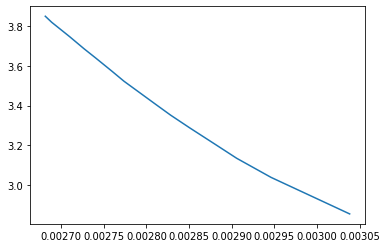

In [27]:
plt.plot(unumpy.nominal_values(1/data[2]),unumpy.nominal_values(unumpy.log(data[1])))

[-3054.64982297    12.01795349]
[83.87148705  0.23164159]
------------------------------
Chi Square value:
859.4255917867217
Expected value
12
Minimum Chi-Square for a good fit
2.2020410288672885
Maximum Chi-Square for a good fit
21.79795897113271
Doubtful minimum Chi-Square for a good fit
-2.6969384566990673
Doubtful maximum Chi-Square for a good fit
26.696938456699066
------------------------------


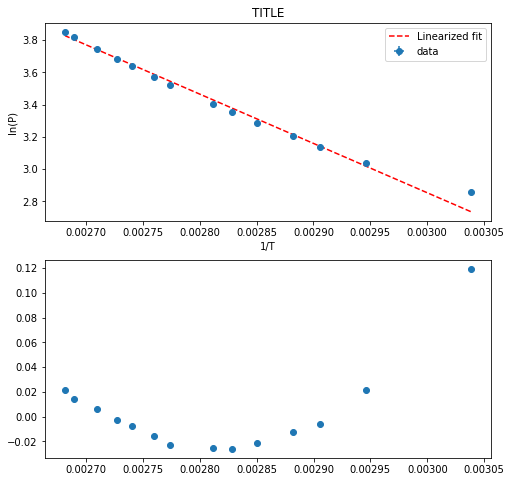

In [35]:
plt.figure(figsize=(8, 8))
plt.subplot(2,1,1)
y=unumpy.log(data[1])
x=1/data[2]
plt.errorbar(unumpy.nominal_values(x),unumpy.nominal_values(y),xerr=unumpy.std_devs(x),yerr=unumpy.std_devs(y),fmt='o',label='data')
def f(x,a,b):
    return a*x + b
popt,pcov = optimize.curve_fit(f,xdata=unumpy.nominal_values(x), ydata=unumpy.nominal_values(y), sigma=(unumpy.std_devs(y)), p0=[-1,4])
print(popt)
perr = np.sqrt(np.diag(pcov))
print(perr)

plt.plot(unumpy.nominal_values(x), f(unumpy.nominal_values(x),*popt), 'r--',label='Linearized fit')

plt.title('TITLE')
plt.legend()
plt.xlabel('1/T')
plt.ylabel('ln(P)')

plt.subplot(2,1,2)
plt.plot(unumpy.nominal_values(x), unumpy.nominal_values(y)-(f(unumpy.nominal_values(x),*popt)), 'o')

print('-'*30)

f_degree = len(x)-2
print('Chi Square value:')
print(sum( ( (unumpy.nominal_values(y)-(f(unumpy.nominal_values(x),*popt))) / unumpy.std_devs(y))**2 ) )
print('Expected value')
print(f_degree)
print('Minimum Chi-Square for a good fit')
print(f_degree - 2* (2*f_degree)**0.5)
print('Maximum Chi-Square for a good fit')
print(f_degree + 2* (2*f_degree)**0.5)

print('Doubtful minimum Chi-Square for a good fit')
print(f_degree - 3* (2*f_degree)**0.5)
print('Doubtful maximum Chi-Square for a good fit')
print(f_degree + 3* (2*f_degree)**0.5)
print('-'*30)

plt.show
plt.savefig('combined')